# (Ford GoBike System Data)

## Investigation Overview

In this investigation, I wanted to look at the users characteristics like: gender, type, and age. Also look at the most popular time period. In addition to the relationship between interst features trip 'duration in minutes' and supported features 'user type' and 'member gender'.
## Dataset Overview

There are 174,952 trips in this dataset that happened in February and 1st, March of 2019. The dataset contains 16 columns that have been cleaned. 

In [5]:
# Import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [6]:
# load dataset and display first five rows of data
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [7]:
# data wrangling
df = df.dropna(axis = 0, how ='any')
def date_type(col):
    ''' This function is to convert data type to `datatime` '''
    df.loc[:,col] = df.loc[:, col].astype('datetime64[ns]')

#convert start_time, end_time, and member_birth_year into appropriate dtypes
date_type('start_time')
date_type('end_time')

df.loc[:,'member_birth_year'] = df.loc[:, 'member_birth_year'].astype(int)

def new_column(col1,col2,col3,col):
    ''' This function is to extract hour, day of week, and date from specific column '''
    df.loc[:, col1] = df.loc[:, col].dt.hour
    df.loc[:, col2] = df.loc[:, col].dt.day_name()
    df.loc[:, col3] = df.loc[:, col].dt.date

    pd.options.mode.chained_assignment = None  # default='warn'
    

#extract hour, day of week, and date from `start_time` and `end_time` columns
new_column('start_hour','day_of_week_start','start_date','start_time')
new_column('end_hour' ,'day_of_week_end' ,'end_date' ,'end_time')

#calculate the age by subtracting the current year from the year of birth
df.loc[:, 'age'] = 2021 - df.member_birth_year

#extract the duration in minutes 
df.loc[:, 'duration_min'] = df.loc[:, 'end_time'] - df.loc[:, 'start_time']
df.loc[:, 'duration_min']= df.loc[:, 'duration_min']/np.timedelta64(1,'m')

def time_type(col):
    ''' This function is to convert data type to `datatime` '''
    df.loc[:,col] = df.loc[:, col].astype('datetime64[ns]')

time_type('start_date')
time_type('end_date')
df.loc[:,'duration_min'] = df.loc[:, 'duration_min'].astype(int)

def drop_outliers(col, value):
    '''This function is to drop the outliers that found in the column'''
    df.drop(df[df[col] > value ].index, inplace = True)
    
#dropping outliers  
drop_outliers('duration_min', 25) 
drop_outliers('age', 60)

## Bike Users Types

Out of 174,952 trips, more than 140,000 were subscribers and less than 20,000 were customers. This means that the subscribers (approximately 91% of users) was higher than that of customers (approximately 8%).

In [8]:
def bar_pie(col, title1, title2):
    '''This function is to create both bar chart and pie chart side by side '''
    plt.figure(figsize=(20,10))

    plt.subplot(1, 2, 1) 
    order = df[col].value_counts().index
    base_color = sb.color_palette()[0]
    sb.countplot(data = df, x = col, color = base_color, order = order);
    plt.xticks(rotation = 90);
    plt.title(title1, size = 16);


    plt.subplot(1, 2, 2) 
    order = df[col].value_counts()
    plt.pie(order , labels = order.index , startangle = 90, counterclock = False, autopct='%1.2f%%');
    plt.title(title2, fontsize= 18);

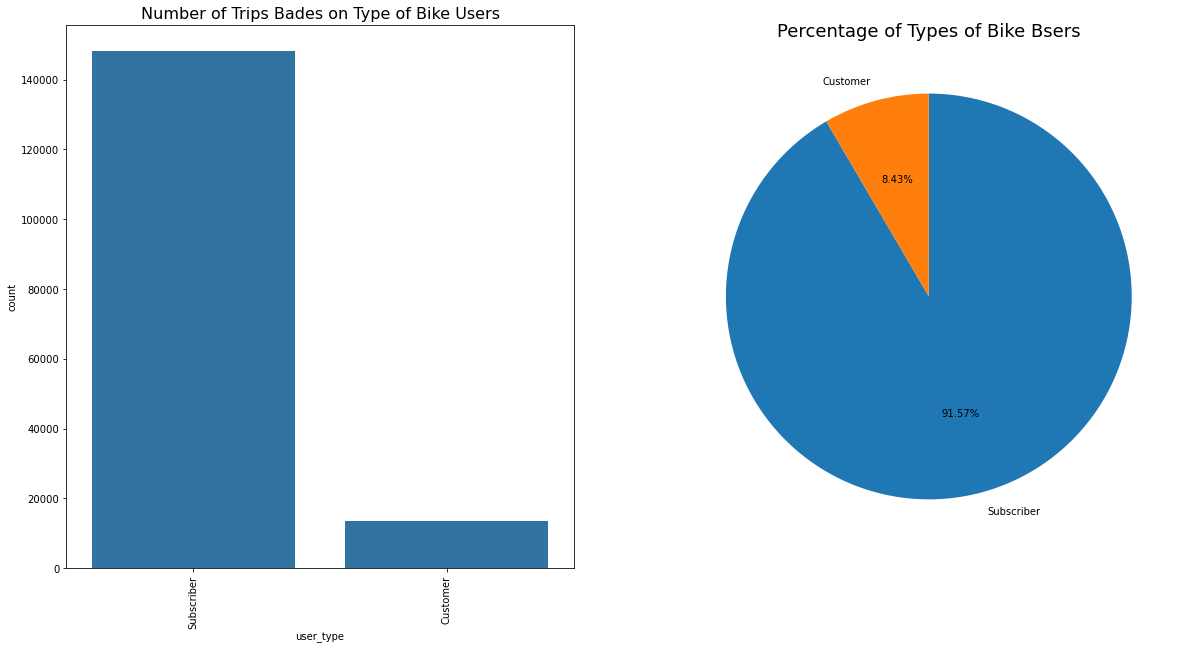

In [9]:
bar_pie('user_type','Number of Trips Bades on Type of Bike Users','Percentage of Types of Bike Bsers' )

## Gender of Bike Users

The number of male bike users is higher by more than 120,000 trips (almost 75%). 

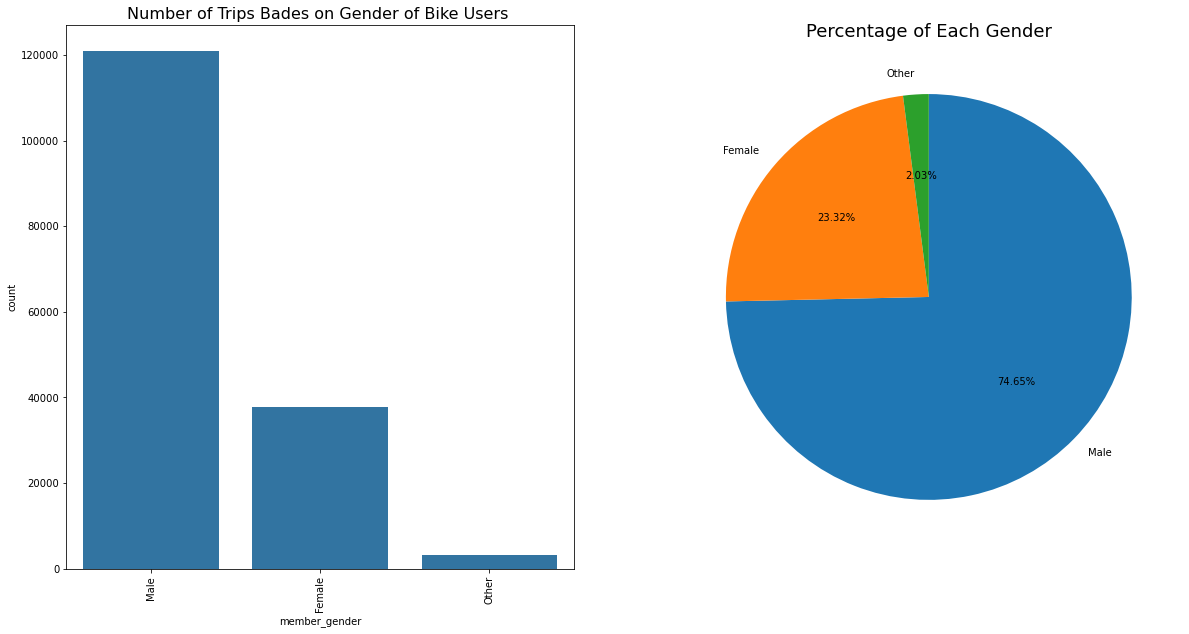

In [10]:
bar_pie('member_gender', 'Number of Trips Bades on Gender of Bike Users ', 'Percentage of Each Gender')

## Age of Bike Users

This distribution is skewed right and show that the median of users age is about 34 years. The boxplot show that the users age range is between 20 - 56 years.

In [11]:
def box_plot(col, title):
    ''' This function is to create a boxplot for one cloumn'''
    dur_min= df.boxplot(column= col)
    dur_min.set_ylabel('Count')
    dur_min.set_title(title);

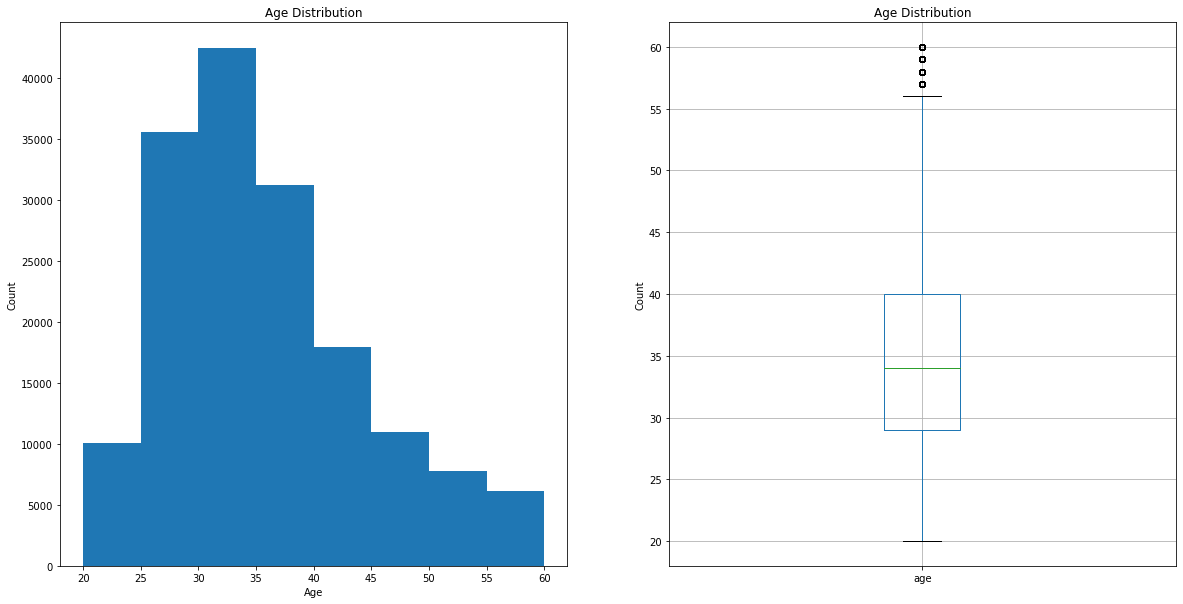

In [12]:
#visualize the distribution of users age with boxplot after dropping outliers in the column  
plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1) 
bins = np.arange(20, 65, 5)
plt.hist(df.age , bins= bins)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')


plt.subplot(1, 2, 2) 
box_plot('age','Age Distribution')

## Trips Based on Day of Week During the 24 Hours

As we notice, the popular time for trips was in weekdays not in weekends (Saturday and Sunday) and the most popular time period was from the 8 am to 9 am in the morning and from 4 pm to 6 pm in the evening in weekdays.

In [13]:
def heat_map(col1,col2,title):
    ''' This function is to create a heatmap only after groupping columns'''
    counts = df.groupby([col1, col2]).size()
    counts = counts.reset_index(name='count')
    counts = counts.pivot(index = col1, columns = col2 , values = 'count')
    
    plt.figure(figsize=(20,10))
    sb.heatmap(counts, annot = True, fmt = 'd')
    plt.title(title);

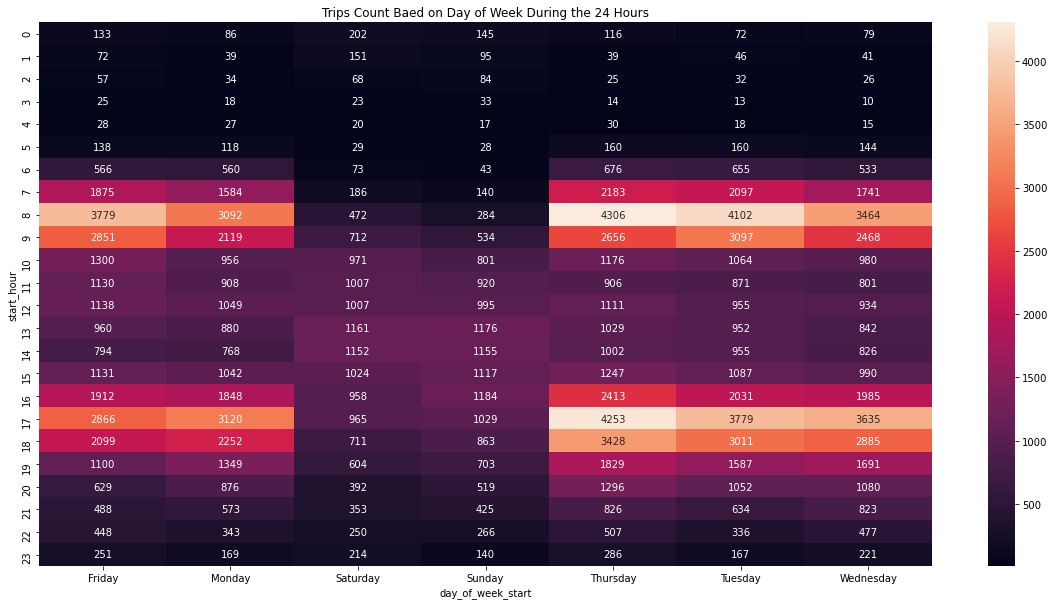

In [14]:
#plot heatmap for two columns: start_hour, day_of_week_start
heat_map('start_hour', 'day_of_week_start', 'Trips Count Baed on Day of Week During the 24 Hours')

## Trips Baed on Gender Type for Each User Type

For both user type subscriber and customer, the number of trips for male was more than other. About 11,000 trips for subscriber and about 10,000 trips for customer. 

In [15]:
def group_plot(col1, col2, title):
    '''This function is to group by columns and plot a heatmap and bar chart '''
    counts = df.groupby([col1, col2]).size()
    counts = counts.reset_index(name='count')
    counts = counts.pivot(index = col1, columns = col2, values = 'count')
        
    
    counts.plot(kind='bar', figsize = (8,8))
    plt.title(title);

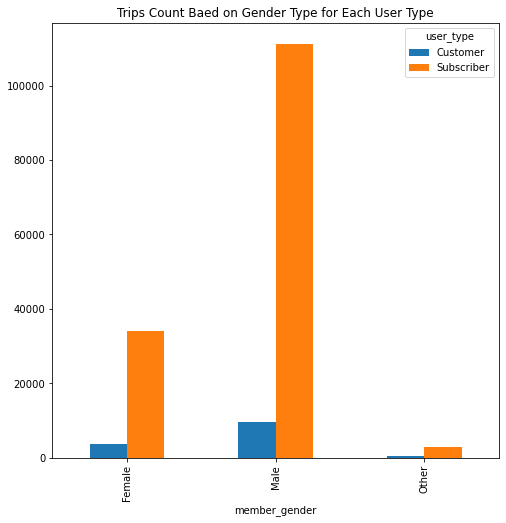

In [16]:
#plot a heatmap and bar chart for two columns: member_gender and user_type    
group_plot('member_gender', 'user_type', 'Trips Count Baed on Gender Type for Each User Type')   

## Trips Based on Trip Duration(min) for Each User Type

The highest duration in minutes for subscriber is 5 min with about 14,000 trips and for customer is 9 min with about 1,000 trips. 


In [17]:
def clustered_bar(col1,col2,title):
    '''This function is to create clustered bar chart'''
    counts = df.groupby([col1, col2]).size()
    counts = counts.reset_index(name='count')
    counts = counts.pivot(index = col1, columns = col2, values = 'count')
    
    counts.plot(kind='bar', figsize = (8,8))
    plt.title(title);

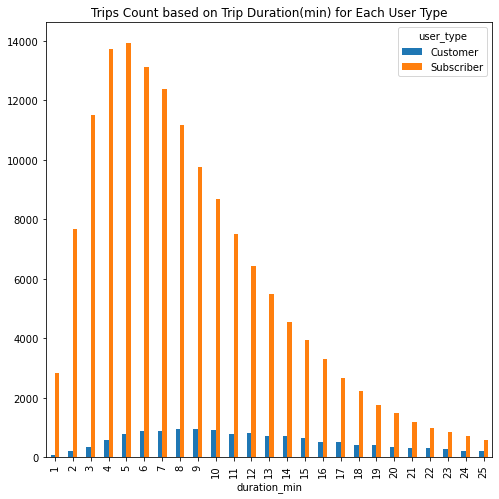

In [22]:
clustered_bar('duration_min', 'user_type', 'Trips Count based on Trip Duration(min) for Each User Type')

## Trips Based on Trip Duration(min)  for Each User Gender


The highest duration in minutes for male is 5 min with more than 10,000 trips and for female is also 5 min with about 3,000 trips.

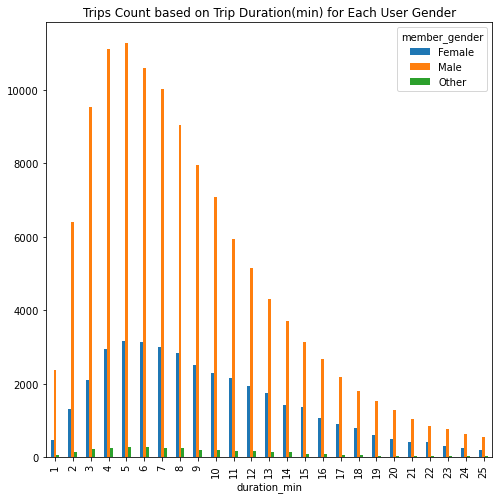

In [23]:
clustered_bar('duration_min', 'member_gender', 'Trips Count based on Trip Duration(min) for Each User Gender')

## The Median of Trips Duration in Minutes for Each User Type for Each Gender

The customer users has median duration higher than subscriber for each gender and the female customer users has the highest median than other gender (12 min). In previous slide, the trip duration for subscriber users and male gender had most trips number but in this slide with multivariate, the customer duration is the highest especially in weekend and the female is highest than other gender.

In [19]:
def heatmap_bar(cat_col1, cat_col2,num_col, title, title2):
    '''This function is to create heatmap and bar chart together for 3 different columns'''
    plt.figure(figsize = [20, 10])
    median = df.groupby([cat_col1, cat_col2]).median()[num_col]
    median = median.reset_index(name = num_col)
    median = median.pivot(index = cat_col1, columns = cat_col2,
                            values = num_col)
    sb.heatmap(median, annot = True, fmt = '.3f',
           cbar_kws = {'label' : title})
    plt.title(title2);
    

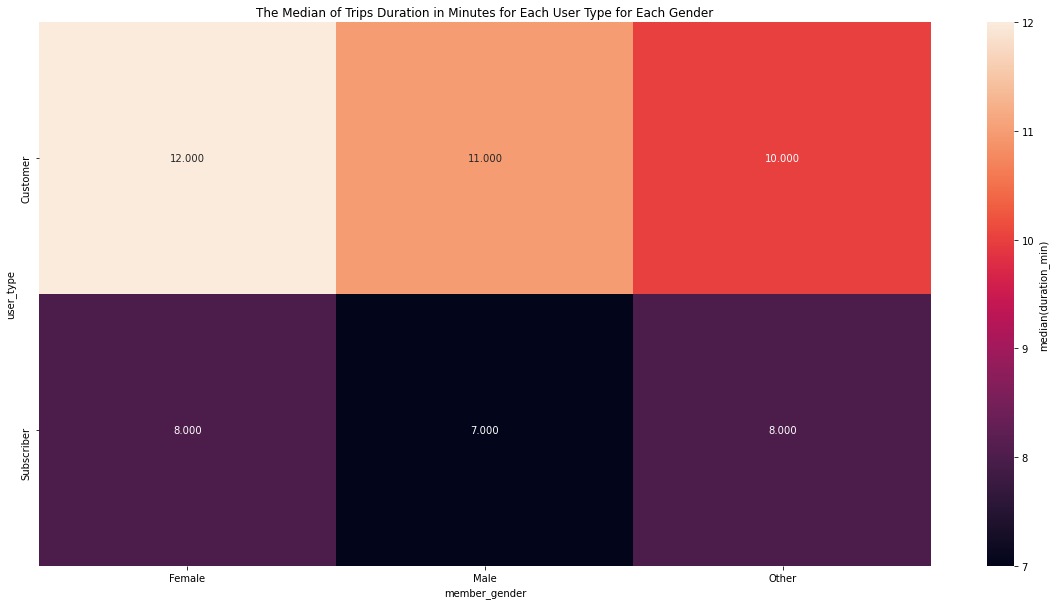

In [20]:
heatmap_bar('user_type', 'member_gender','duration_min', 'median(duration_min)', 
           'The Median of Trips Duration in Minutes for Each User Type for Each Gender')

In [21]:
!jupyter nbconvert communicating-data-findings-slide-deck.ipynb --to slides --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook communicating-data-findings-slide-deck.ipynb to slides
[NbConvertApp] Writing 577246 bytes to communicating-data-findings-slide-deck.slides.html
